In [4]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Analiza ramek danych

In [5]:
X_train = pd.read_csv("artifical_train_data.csv")
y_train = pd.read_csv("artifical_train_labels.csv")
X_test = pd.read_csv("artifical_test_data.csv")

In [6]:
y_train["0"].unique()

array([-1,  1])

In [7]:
y_train = y_train.values.ravel()

Sprawdzenie braku w danych:

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2000 non-null   int64
 1   1       2000 non-null   int64
 2   2       2000 non-null   int64
 3   3       2000 non-null   int64
 4   4       2000 non-null   int64
 5   5       2000 non-null   int64
 6   6       2000 non-null   int64
 7   7       2000 non-null   int64
 8   8       2000 non-null   int64
 9   9       2000 non-null   int64
 10  10      2000 non-null   int64
 11  11      2000 non-null   int64
 12  12      2000 non-null   int64
 13  13      2000 non-null   int64
 14  14      2000 non-null   int64
 15  15      2000 non-null   int64
 16  16      2000 non-null   int64
 17  17      2000 non-null   int64
 18  18      2000 non-null   int64
 19  19      2000 non-null   int64
 20  20      2000 non-null   int64
 21  21      2000 non-null   int64
 22  22      2000 non-null   int64
 23  23      2000 

In [9]:
X_train.describe() # badanie statystyk

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,514.450000,488.665000,477.888000,488.793000,507.522500,499.658500,478.436500,489.607500,495.38450,512.823500,...,504.674000,482.099500,485.000500,479.121000,498.843500,479.587500,500.472000,477.593500,481.42600,480.398000
std,42.190645,14.278821,11.473808,40.446955,36.961528,28.798395,7.785967,14.569474,19.34745,43.284502,...,40.995403,11.934899,43.010678,11.505153,53.677655,51.313223,96.954852,9.268938,113.46729,44.456189
min,362.000000,427.000000,442.000000,335.000000,371.000000,415.000000,453.000000,433.000000,424.00000,350.000000,...,378.000000,441.000000,367.000000,435.000000,333.000000,317.000000,207.000000,450.000000,84.00000,347.000000
25%,485.000000,479.000000,470.000000,460.750000,483.000000,480.000000,473.000000,480.000000,482.00000,484.000000,...,477.000000,474.000000,449.000000,471.000000,454.000000,435.000000,433.750000,470.000000,398.75000,451.000000
50%,513.000000,489.000000,477.000000,489.000000,507.000000,499.000000,478.000000,490.000000,495.00000,512.000000,...,504.000000,482.000000,485.000000,479.000000,498.500000,480.000000,496.000000,478.000000,487.50000,480.000000
75%,543.000000,498.000000,486.000000,515.000000,531.000000,518.000000,483.000000,499.000000,508.00000,542.000000,...,532.000000,490.000000,521.000000,487.000000,543.000000,522.000000,568.000000,485.000000,562.00000,512.000000
max,668.000000,537.000000,514.000000,661.000000,642.000000,606.000000,506.000000,536.000000,561.00000,680.000000,...,654.000000,528.000000,614.000000,516.000000,653.000000,646.000000,829.000000,505.000000,807.00000,621.000000


### 1.1 statystyki

In [10]:
stats = X_train.describe()
stats_test = X_test.describe()
print(stats.iloc[1].mean())
print(stats.iloc[2].mean())
print(stats.iloc[2].min())
print(stats.iloc[2].max())
print("Testowy:")
print(stats_test.iloc[1].mean())
print(stats_test.iloc[2].mean())
print(stats_test.iloc[2].min())
print(stats_test.iloc[2].max())
print("średnia")
print(stats.iloc[1].nlargest(3).round(2))
print("odchylenie")
print(stats.iloc[2].nlargest(3).round(2))
print("min")
print(stats.iloc[3].nlargest(3).round(2))
print("max")
print(stats.iloc[5].nlargest(3).round(2))
print("mediana")
print(stats.iloc[7].nlargest(3).round(2))
print("średnia")
print(stats.iloc[1].nsmallest(3).round(2))
print("odchylenie")
print(stats.iloc[2].nsmallest(3).round(2))
print("min")
print(stats.iloc[3].nsmallest(3).round(2))
print("max")
print(stats.iloc[5].nsmallest(3).round(2))
print("mediana")
print(stats.iloc[7].nsmallest(3).round(2))

489.00536666666653
30.94905669179654
4.541956702275222
113.46729016314997
Testowy:
489.4076111111111
30.598747393544905
4.233919462181896
112.95665385927971
średnia
0    514.45
9    512.82
4    507.52
Name: mean, dtype: float64
odchylenie
28    113.47
26     96.95
24     53.68
Name: std, dtype: float64
min
16    464.0
12    458.0
6     453.0
Name: min, dtype: float64
max
0    513.0
9    512.0
4    507.0
Name: 50%, dtype: float64
mediana
26    829.0
28    807.0
9     680.0
Name: max, dtype: float64
średnia
12    477.12
27    477.59
2     477.89
Name: mean, dtype: float64
odchylenie
16    4.54
12    5.17
6     7.79
Name: std, dtype: float64
min
28     84.0
26    207.0
25    317.0
Name: min, dtype: float64
max
2     477.0
12    477.0
6     478.0
Name: 50%, dtype: float64
mediana
16    493.0
12    494.0
27    505.0
Name: max, dtype: float64


In [11]:
print("Wymiary:") # badanie wymiarów
print("treningowy: ",X_train.shape)
print("testowy: ",X_test.shape)

Wymiary:
treningowy:  (2000, 30)
testowy:  (600, 30)


### 1.2 Korelacja Pearsona

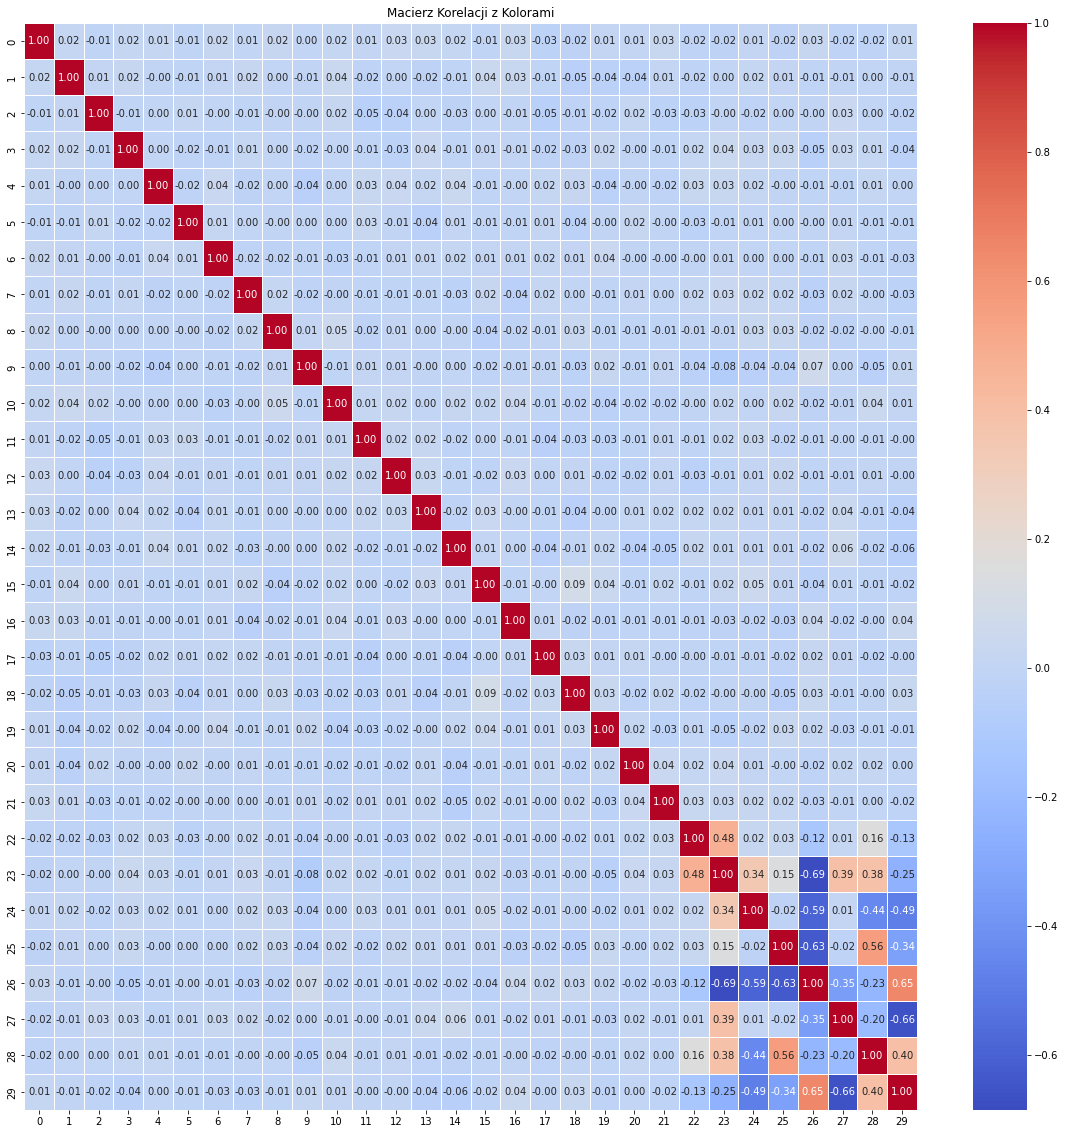

In [12]:
cov_matrix = X_train.corr() # badanie zalezności w zmiennych

# Utwórz mapę kolorów
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Narysuj macierz kowariancji z kolorami
plt.figure(figsize=(20, 20))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap=cmap, linewidths=.5)
plt.title("Macierz Korelacji z Kolorami")
plt.show()

widzimy, ze dane są mało skolerowane lub wcale dla kolumn o indeksach <=20, ale za to umiarkowana i silna korelacja zaczyna się przy zmiennych o indeksach kolumn większych ni 20

In [5]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,544,484,486,511,547,490,472,517,494,519,...,491,491,440,452,434,517,628,463,471,515
1,491,504,475,533,575,491,480,503,492,494,...,510,487,499,473,551,435,528,474,311,465
2,548,508,470,528,470,508,474,507,521,485,...,439,496,460,487,474,535,431,481,606,485
3,574,486,475,456,510,456,484,497,457,549,...,543,476,529,493,569,526,377,472,545,457
4,527,472,476,402,556,513,469,482,507,556,...,527,464,429,475,538,456,509,472,426,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,547,469,493,393,498,484,469,482,482,480,...,452,473,505,481,535,549,419,467,570,483
1996,517,483,474,470,481,466,484,511,487,558,...,521,494,448,497,590,463,348,488,423,444
1997,505,487,494,451,456,518,483,494,481,450,...,494,493,544,498,463,527,406,489,643,449
1998,546,485,488,502,492,533,490,474,526,519,...,505,476,490,481,443,551,473,472,691,511


# 2. Stworzenie modeli do selekcji zmiennych

### 2.1 Regresja logistyczna

### 2.1.1 Szukanie mozliwości odrzucenia zmiennych za pomocą modelu l1

In [155]:
from sklearn.linear_model import LogisticRegression
pipeline_lr = Pipeline ([
    ('scaler', StandardScaler()), # Normalizuje dane
    ('classifier', LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000))
])

params = {
    'classifier__C': [0.001,0.01,0.1,1,10,100]
}

grid_search_lr = GridSearchCV(pipeline_lr, params, cv=5, scoring='balanced_accuracy')
grid_search_lr.fit(X_train, y_train)
grid_search_lr.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=0.01, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

In [276]:
lr1 = LogisticRegression(penalty='l1', C=0.01, solver='liblinear', max_iter=1000)
lr1.fit(X_train,y_train)

coefs = []
i=0
for coef_row in lr1.coef_:
    for coef in coef_row:
        if np.round(coef,4) == 0:
            print(f"{i}. zmienna ma istotność na poziomie: {coef:.5f}")
        else: coefs.append(np.round(coef,4))
        i+=1
print("pozostałe:",coefs)

2. zmienna ma istotność na poziomie: 0.00000
9. zmienna ma istotność na poziomie: 0.00000
14. zmienna ma istotność na poziomie: 0.00000
16. zmienna ma istotność na poziomie: 0.00000
17. zmienna ma istotność na poziomie: 0.00000
21. zmienna ma istotność na poziomie: 0.00000
23. zmienna ma istotność na poziomie: 0.00000
pozostałe: [0.0001, -0.0014, 0.0009, 0.0007, 0.0009, -0.001, 0.002, 0.0003, -0.0007, -0.0033, -0.001, -0.002, -0.0011, 0.0016, 0.0012, -0.001, 0.0053, 0.0066, -0.0025, -0.0012, -0.0041, -0.0003, -0.0004]


In [180]:
from sklearn.feature_selection import RFE 

rfe = RFE(estimator=LogisticRegression(penalty='l1', C=0.01, solver='liblinear', max_iter=1000), n_features_to_select=10)
rfe.fit(X_train, y_train)
rfe.score(X_train,y_train) # dokładność modelu na podstawie powyszych usuniętych cech

0.6105

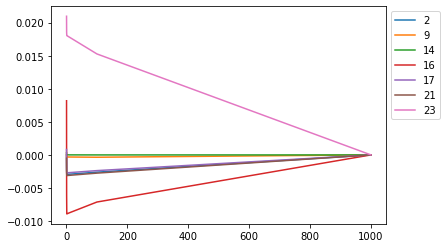

In [94]:
selected_columns = X_train.iloc[:, [2, 9, 14,16,17,21,23]]
C = np.array([5, 2, 1, 0.5, 0.1, 0.01, 0.001])
coefs = []
for i in C:
    lm_l1_i = LogisticRegression(penalty='l1', C=i, solver='liblinear',max_iter=5000)
    lm_l1_i.fit(selected_columns, y_train)
    coefs.append(lm_l1_i.coef_[0])
plt.plot(1/C, np.array(coefs), label = selected_columns.columns)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

/Users/janpoglod/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/janpoglod/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/janpoglod/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
No handles with labels found to put in legend.


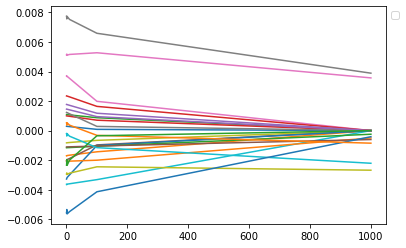

In [106]:
excluded_columns = X_train.drop(columns=["2", "9", "14","16","17","21","23"])
C = np.array([5, 2, 1, 0.5, 0.1, 0.01, 0.001])
coefs = []
for i in C:
    lm_l1_i = LogisticRegression(penalty='l1', C=i, solver='liblinear')
    lm_l1_i.fit(excluded_columns, y_train)
    coefs.append(lm_l1_i.coef_[0])
plt.plot(1/C, np.array(coefs))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

Model regresji logistycznej z regularyzacją l1 bez części kolumn, które udało się wykryć

In [13]:
selektor1 = LogisticRegression(penalty='l1', C=0.01, solver='liblinear', max_iter=1000)
selektor1.fit(X_train,y_train)

LogisticRegression(C=0.01, max_iter=1000, penalty='l1', solver='liblinear')

In [278]:
selektor1_coefs = []

for coef_row in lr1.coef_:
    for coef in coef_row:
        selektor1_coefs.append(np.round(coef,4))

#### Tworzenie modelu z regularyzacją l2 wraz z selekcją zmiennych na podstawie regularyzacji l1

In [154]:
from sklearn.feature_selection import SequentialFeatureSelector

params = {
    'classifier__C': [0.001,0.01,0.1,1,10,100]
}

pipeline_lr2 = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selector', SequentialFeatureSelector(selektor1)),  # selekcja zmiennych
    ('classifier', LogisticRegression('l2')) 
])

# Dopasowanie modelu
grid_search_lr2 = GridSearchCV(pipeline_lr2, params, cv=5, scoring='balanced_accuracy')
grid_search_lr2.fit(X_train, y_train)
grid_search_lr2.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selector',
                 SequentialFeatureSelector(estimator=LogisticRegression(C=0.01,
                                                                        max_iter=1000,
                                                                        penalty='l1',
                                                                        solver='liblinear'))),
                ('classifier', LogisticRegression(C=0.01))])

### Wynik wytrenowanego modelu z selekcją zmiennych l1 na zbiorze treningowym

In [22]:
lr2 = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selector', SequentialFeatureSelector(selektor1,n_features_to_select=20,cv=5)),  # selekcja zmiennych
    ('classifier', LogisticRegression('l2', C=0.001)) 
])
lr2.fit(X_train,y_train)
y_pred_l2 = lr2.predict(X_train)
balanced_accuracy_score(y_pred_l2, y_train)

0.6175001175001175

### Wynik wytrenowanego modelu z selekcją zmiennych LogisticRegression na zbiorze treningowym

In [153]:
pipeline_lr2 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(penalty='l2')) 
])

grid_search_lr2 = GridSearchCV(pipeline_lr2, params, cv=5, scoring='balanced_accuracy')
grid_search_lr2.fit(X_train, y_train)
grid_search_lr2.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=0.001))])

### Testowanie róznych klasyfikatorów do selekcji zmiennych na modelu regresji logistycznej z regularyzacją

In [18]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)
rfe.fit(X_train, y_train)
y_pred_2 = rfe.predict(X_train)
balanced_accuracy_score(y_pred_2, y_train)

0.6170004680018719

In [21]:
pipeline_lr2 = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selector', SequentialFeatureSelector(LogisticRegression(),n_features_to_select=20, cv=5)),  # selekcja zmiennych
    ('classifier', LogisticRegression(penalty='l2', C=0.001)), 
])
pipeline_lr2.fit(X_train,y_train)
y_pred_2 = pipeline_lr2.predict(X_train)
balanced_accuracy_score(y_pred_2, y_train)

0.6140041041477493

Dodanie LogisticRegression() jako drugi selektor

In [36]:
selektor2 = LogisticRegression()
selektor2.fit(X_train,y_train)

/Users/janpoglod/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [277]:
selektor2_coefs = []
for coef_row in selektor2.coef_:
    for coef in coef_row:
        selektor2_coefs.append(np.round(coef,4))

/Users/janpoglod/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 2.1.2 Sprawdzenie wpływu poszczególnych cech za pomocą randomforest

In [273]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Wartości ważności cech
selektor3_coefs = np.round(rf_model.feature_importances_,4)
selektor3_coefs

array([0.0228, 0.0228, 0.0216, 0.0256, 0.0224, 0.022 , 0.0195, 0.0231,
       0.021 , 0.0223, 0.023 , 0.0236, 0.0172, 0.023 , 0.0243, 0.0218,
       0.0206, 0.0203, 0.0246, 0.0235, 0.0242, 0.0201, 0.0663, 0.0637,
       0.0771, 0.0597, 0.0698, 0.0576, 0.0567, 0.0598])

In [181]:
from sklearn.linear_model import LogisticRegression
pipeline_rf = Pipeline ([
    ('scaler', StandardScaler()), # Normalizuje dane
    ('classifier', RandomForestClassifier())
])

params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
}

grid_search_rf = GridSearchCV(pipeline_rf, params, cv=5, scoring='balanced_accuracy')
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=20, n_estimators=200))])

In [182]:
grid_search_rf.best_params_

{'classifier__max_depth': 20,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 200}

In [24]:
selektor3 = RandomForestClassifier(max_depth=20,min_samples_leaf=2,n_estimators=200)

In [26]:
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selector', SequentialFeatureSelector(selektor3,n_features_to_select=20, cv=5)),  # selekcja zmiennych
    ('classifier', LogisticRegression('l2', C=0.001)), 
])
pipeline_rf.fit(X_train,y_train)
y_pred_3 = pipeline_rf.predict(X_train)
balanced_accuracy_score(y_pred_3, y_train)

0.6025009225083026

## 2.1.3 Sprawdzenie wpływu poszczególnych cech za pomocą modelu SVC

In [28]:
from sklearn.svm import SVC

In [191]:
pipeline_svc = Pipeline ([
    ('scaler', StandardScaler()), # Normalizuje dane
    ('classifier', SVC())
])

params = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': [0.01, 0.1, 1]
}

grid_search_svc = GridSearchCV(pipeline_svc, params, cv=5, scoring='balanced_accuracy')
grid_search_svc.fit(X_train, y_train)
grid_search_svc.best_params_

{'classifier__C': 1, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}

In [29]:
selektor4 = SVC(C=1,kernel='rbf',gamma=0.1)

In [31]:
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selector', SequentialFeatureSelector(selektor4,n_features_to_select=20)),  # selekcja zmiennych
    ('classifier', LogisticRegression('l2', C=0.001)), 
])
pipeline_svm.fit(X_train,y_train)
y_pred_4 = pipeline_svm.predict(X_train)
balanced_accuracy_score(y_pred_4, y_train)

0.6085027125678142

In [339]:
bez_selekcji = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression('l2', C=0.001)), 
])
bez_selekcji.fit(X_train,y_train)
y_pred_zero = bez_selekcji.predict(X_train)
balanced_accuracy_score(y_pred_zero, y_train)

0.6050004200016801

In [226]:
from sklearn.inspection import permutation_importance
selektor4.fit(X_train, y_train)
result = permutation_importance(selektor4, X_train, y_train, n_repeats=10, random_state=42)

In [266]:
selektor4_coefs = result['importances_mean']
selektor4_coefs = np.round(selektor4_coefs,4)
selektor4_coefs

array([0.0739, 0.    , 0.    , 0.0649, 0.0512, 0.0172, 0.    , 0.    ,
       0.0009, 0.0767, 0.0025, 0.    , 0.    , 0.0014, 0.0658, 0.0228,
       0.    , 0.    , 0.0038, 0.0074, 0.0708, 0.    , 0.0815, 0.    ,
       0.142 , 0.1352, 0.2529, 0.    , 0.3006, 0.0785])

Najlepszy do selekcji zmiennych (na podstawie danych treningowych) w przypadku regresji L2 okazał się selektor2. Zapiszę ten model jako model1

In [48]:
model1 = Pipeline([  ## stworzenie modelu pierwszego
    ('scaler', StandardScaler()),
    ('feature_selector', SequentialFeatureSelector(selektor1, n_features_to_select=20)),  # selekcja zmiennych
    ('classifier', LogisticRegression(penalty = 'l2', C=0.001)), 
])
model1.fit(X_train,y_train)
model1.score(X_train,y_train)
y_pred_4 = model1.predict(X_train)
balanced_accuracy_score(y_pred_4, y_train)

0.6175001175001175

### 2.1.4 Dodanie ostatniego selektora jako drzewo decyzyjne

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [217]:
pipeline_dt = Pipeline ([
    ('scaler', StandardScaler()), # Normalizuje dane
    ('classifier', DecisionTreeClassifier())
])

params = {
    'classifier__max_depth': [5, 7, 10, 12, 18, 24],
    'classifier__min_samples_split': [2, 5, 10, 12, 15]
}

grid_search_dt = GridSearchCV(pipeline_dt, params, cv=5, scoring='balanced_accuracy')
grid_search_dt.fit(X_train, y_train)
grid_search_dt.best_params_

{'classifier__max_depth': 5, 'classifier__min_samples_split': 15}

In [33]:
selektor5 = DecisionTreeClassifier(max_depth=5,min_samples_split=15)
selektor5.fit(X_train,y_train)
selektor5_coefs = np.round(selektor5.feature_importances_,4)

In [34]:
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selector', SequentialFeatureSelector(selektor5,n_features_to_select=20)),  # selekcja zmiennych
    ('classifier', LogisticRegression('l2', C=0.001)), 
])
pipeline_dt.fit(X_train,y_train)
y_pred_5 = pipeline_dt.predict(X_train)
balanced_accuracy_score(y_pred_5, y_train)

0.598502462561564

In [303]:
selektory = [selektor1,selektor2,selektor3,selektor4,selektor5]
selektory_nazwy = ["Regresja logistyczna l1", "Regresja logistyczna domyślna", "Random Forest", "SVC", "Dessicion tree"]
waznosc_cech = pd.DataFrame({"Regresja logistyczna l1": list(np.abs(selektor1_coefs)),
                             "Regresja logistyczna domyślna": list(np.abs(selektor2_coefs)),
                              "Random Forest": list(np.abs(selektor3_coefs)/10), # Dzielę przez 10 dla random forest bo jak się okazało później na obrazku wszystkie wartości były zbyt niebieskie a dzięki temu wyraźniej zwizualizuje się wynik
                              "SVC": list(np.abs(selektor4_coefs)), 
                              "Dessicion tree": list(np.abs(selektor5_coefs))})

In [279]:
k=0
for j in range(len(selektor1_coefs)):
    k+=1
    print(f"Waznosc zmiennej {k} to kolejno: {selektor1_coefs[j]}, {selektor2_coefs[j]}, {selektor3_coefs[j]}, {selektor4_coefs[j]}, {selektor5_coefs[j]}")

Waznosc zmiennej 1 to kolejno: 0.0001, 0.0002, 0.0228, 0.0739, 0.0
Waznosc zmiennej 2 to kolejno: -0.0014, -0.0018, 0.0228, 0.0, 0.0
Waznosc zmiennej 3 to kolejno: 0.0, 0.0031, 0.0216, 0.0, 0.0021
Waznosc zmiennej 4 to kolejno: 0.0009, 0.001, 0.0256, 0.0649, 0.0
Waznosc zmiennej 5 to kolejno: 0.0007, 0.001, 0.0224, 0.0512, 0.0
Waznosc zmiennej 6 to kolejno: 0.0009, 0.0014, 0.022, 0.0172, 0.0
Waznosc zmiennej 7 to kolejno: -0.001, -0.0043, 0.0195, 0.0, 0.0
Waznosc zmiennej 8 to kolejno: 0.002, 0.0037, 0.0231, 0.0, 0.0122
Waznosc zmiennej 9 to kolejno: 0.0003, 0.001, 0.021, 0.0009, 0.0
Waznosc zmiennej 10 to kolejno: 0.0, 0.0001, 0.0223, 0.0767, 0.0
Waznosc zmiennej 11 to kolejno: -0.0007, -0.0011, 0.023, 0.0025, 0.0
Waznosc zmiennej 12 to kolejno: -0.0033, -0.0034, 0.0236, 0.0, 0.0
Waznosc zmiennej 13 to kolejno: -0.001, -0.0059, 0.0172, 0.0, 0.0
Waznosc zmiennej 14 to kolejno: -0.002, -0.0021, 0.023, 0.0014, 0.0
Waznosc zmiennej 15 to kolejno: 0.0, 0.0001, 0.0243, 0.0658, 0.0
Waznosc z

Text(154.5, 0.5, 'Kolejne zmienne')

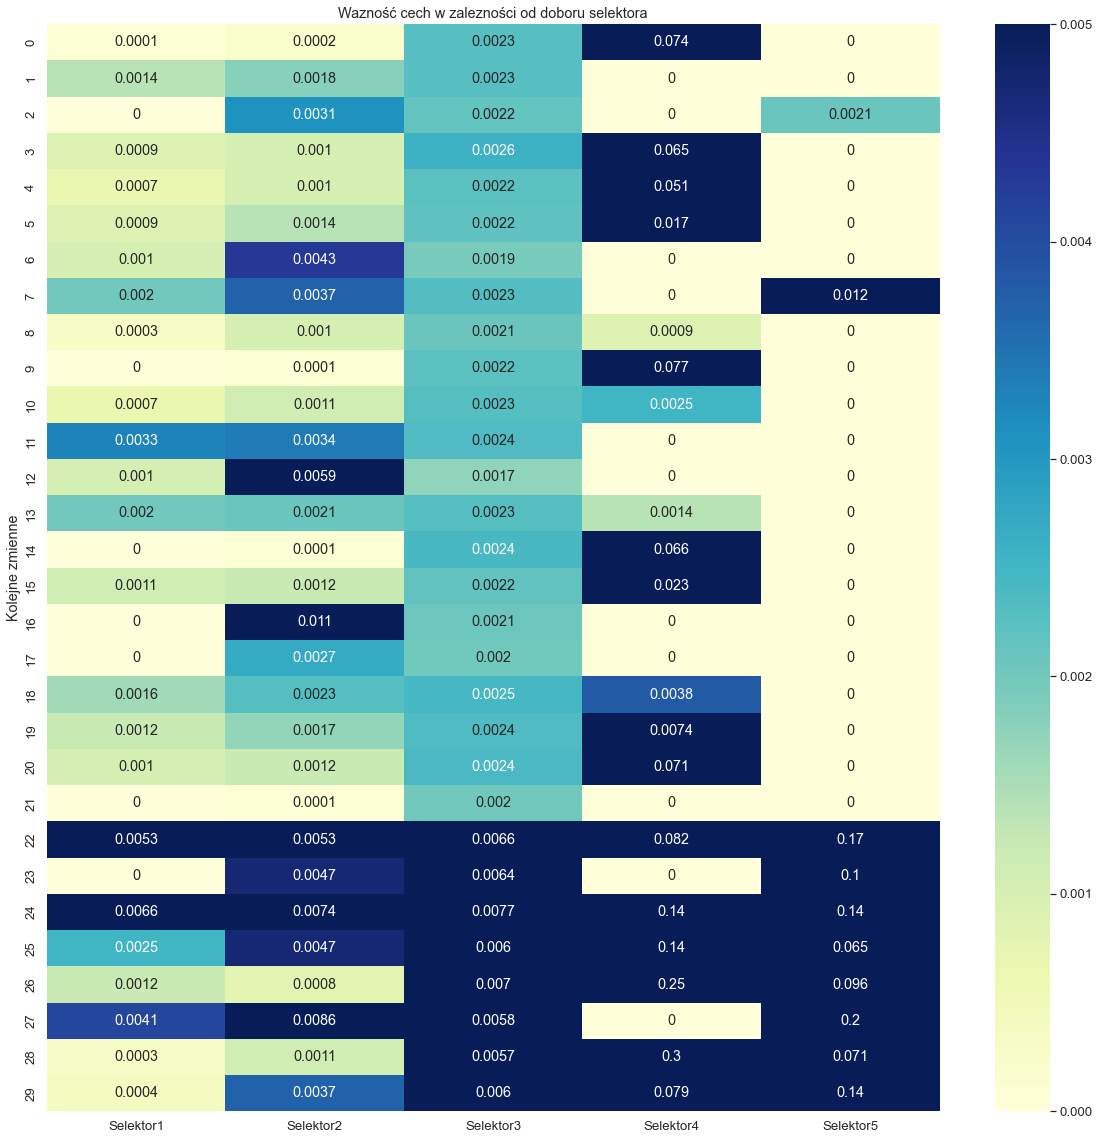

In [305]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 20))
selektory_nazwy = ["Regresja logistyczna l1", "Regresja logistyczna domyślna", "Random Forest", "SVC", "Logistic Regression"]
sns.heatmap(waznosc_cech, annot=True, cmap='YlGnBu', vmin=0, vmax=0.005)

# Dodaj tytuł i oznaczenia osi
plt.title('Wazność cech w zalezności od doboru selektora')
plt.ylabel('Kolejne zmienne')

Stwierdzam na podstawie powyzszego ze najlepsze selektory jakie na tych danych znalazłem to random forest (selektor3) i regresja logistyczna bez parametrów (selektor2) w dalszej części będę korzystać z tych selektorów do selekcji zmiennych. W raporcie dokładniej opisałem skąd wziąłem taką decyzję

# 3.1 Model 2 - Stworzenie modelu przy uzyciu Lasu losowego

Przeprowadza test w celu sprawdzenia skuteczności selektorów

In [50]:
rf = RandomForestClassifier(max_depth=20,min_samples_leaf=2,n_estimators=200) # optymalne parametry znaleźliśmy wcześniej

In [209]:
k=0
for i in selektory:
    k +=1
    modeli = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selector', SequentialFeatureSelector(i, n_features_to_select=10, cv=5)),  # selekcja zmiennych
        ('classifier', rf), 
    ])
    modeli.fit(X_train,y_train)
    print(f"Dla selektora{k} dostaliśmy wynik: {modeli.score(X_train,y_train)}")

Dla selektora1 dostaliśmy wynik: 0.9995
Dla selektora2 dostaliśmy wynik: 0.9995
Dla selektora3 dostaliśmy wynik: 0.995
Dla selektora4 dostaliśmy wynik: 0.996


Stworzenie modelu lasu losowego przy uzyciu selektora zmiennych z regresji logistycznej

In [51]:
model2 = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selector', SequentialFeatureSelector(selektor1, n_features_to_select=20, cv=5)),  # selekcja zmiennych
        ('classifier', rf), 
    ])
model2.fit(X_train,y_train)
model2.score(X_train,y_train)

1.0

In [53]:
y_pred = model2.predict(X_train)
balanced_accuracy_score(y_pred,y_train)

1.0

# 3.2 Model 3 - Stworzenie modelu przy uzyciu SVC

Stworzenie modelu lasu losowego przy uzyciu selektora zmiennych z regresji logistycznej

In [274]:
svc = SVC(C=1,kernel='rbf',gamma=0.1, probability=True)

In [58]:
model3_zRegresją = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selector', SequentialFeatureSelector(selektor2, n_features_to_select=20, cv=5)),  # selekcja zmiennych
        ('classifier', svc), 
    ])
model3_zRegresją.fit(X_train,y_train)
y_pred = model3_zRegresją.predict(X_train)
balanced_accuracy_score(y_pred,y_train)

0.9205037845340608

Stworzenie modelu lasu losowego przy uzyciu selektora zmiennych z lasu losowego

In [275]:
model3 = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selector', SequentialFeatureSelector(selektor3, n_features_to_select=20, cv=5)),  # selekcja zmiennych
        ('classifier', svc), 
    ])
model3.fit(X_train,y_train)
y_pred = model3.predict(X_train)
balanced_accuracy_score(y_pred,y_train)

0.9495364124494083

Kazdy powyzszy Model SVC okazał się być lepszy na selektorze 3 (na danych treningowych)

# 3.3 Model 4 - Stworzenie modelu przy uzyciu sieci neuronowej (sklearn)

Szukanie najlepszych parametrów dla sieci neuronowej:

In [61]:
from sklearn.neural_network import MLPClassifier

In [309]:
pipeline_nn = Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', MLPClassifier(max_iter=4000))  
])

param_grid = {
    'classifier__hidden_layer_sizes': [(2, ),(10,), (50,), (100,)], 
    'classifier__alpha': [0.0001, 0.001, 0.01],  
    'classifier__learning_rate_init': [0.001, 0.01, 0.1] 
}

grid_search_nn = GridSearchCV(pipeline_nn, param_grid, cv=5, scoring='balanced_accuracy')
grid_search_nn.fit(X_train, y_train)
grid_search_nn.score(X_train,y_train)

0.829

In [310]:
grid_search_nn.best_params_

{'classifier__alpha': 0.01,
 'classifier__hidden_layer_sizes': (10,),
 'classifier__learning_rate_init': 0.1}

Zbudowanie modelu sieci neuronowej z selektorem regresji logistycznej

In [74]:
nn = MLPClassifier(alpha=0.01, hidden_layer_sizes=(10,),learning_rate_init=0.1)
model4_zregresja = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selector', SequentialFeatureSelector(selektor2, n_features_to_select=20, cv=5)),  # selekcja zmiennych
        ('classifier', nn), 
    ])
model4_zregresja.fit(X_train,y_train)
y_pred = model4_zregresja.predict(X_train)
balanced_accuracy_score(y_pred,y_train)

0.7329717678298555

Zbudowanie modelu sieci neuronowej z selektorem drzew losowych

In [75]:
nn = MLPClassifier(alpha=0.01, hidden_layer_sizes=(10,),learning_rate_init=0.1)
model4 = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selector', SequentialFeatureSelector(selektor3, n_features_to_select=20, cv=5)),  # selekcja zmiennych
        ('classifier', nn), 
    ])
model4.fit(X_train,y_train)
y_pred = model4.predict(X_train)
balanced_accuracy_score(y_pred,y_train)

0.836001344005376

# 3.4 Model 5 - Stworzenie modelu przy uzyciu xgboost 

Znalezienie najlepszych parametrów dla xgboost

In [70]:
from xgboost import XGBClassifier
y_train[y_train == -1] = 0

In [334]:
pipeline_xg = Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', XGBClassifier())  
])

params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

grid_search_xg = GridSearchCV(pipeline_xg, params, cv=5, scoring='balanced_accuracy')
grid_search_xg.fit(X_train, y_train)
grid_search_xg.score(X_train,y_train)

1.0

In [335]:
grid_search_xg.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__max_depth': 7,
 'classifier__n_estimators': 200}

Zbudowanie modelu xgboost z selektorem drzew losowych

In [71]:
xg = XGBClassifier(learning_rate=0.1,max_depth=7,n_estimtors=200)
model5_zregresja = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selector', SequentialFeatureSelector(selektor2, n_features_to_select=20, cv=5)),  # selekcja zmiennych
        ('classifier', xg), 
    ])
model5_zregresja.fit(X_train,y_train)
y_pred = model5_zregresja.predict(X_train)
balanced_accuracy_score(y_pred,y_train)

/Users/janpoglod/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [22:50:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimtors" } are not used.

  warnings.warn(smsg, UserWarning)


0.9975044775402979

In [73]:
model5 = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selector', SequentialFeatureSelector(selektor3, n_features_to_select=20, cv=5)),  # selekcja zmiennych
        ('classifier', xg), 
    ])
model5.fit(X_train,y_train)
y_pred = model5.predict(X_train)
balanced_accuracy_score(y_pred,y_train)

/Users/janpoglod/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [23:04:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimtors" } are not used.

  warnings.warn(smsg, UserWarning)


0.9995004995004995

# 3.4 Model 6 - Stworzenie modelu przy uzyciu extra trees 

In [76]:
from sklearn.ensemble import ExtraTreesClassifier

In [340]:
pipeline_et = Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', ExtraTreesClassifier())  
])

params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search_et = GridSearchCV(pipeline_et, params, cv=5, scoring='balanced_accuracy')
grid_search_et.fit(X_train, y_train)
grid_search_et.score(X_train,y_train)

1.0

In [341]:
grid_search_et.best_params_

{'classifier__max_depth': 20,
 'classifier__min_samples_leaf': 1,
 'classifier__n_estimators': 200}

Zbudowanie modelu xgboost z selektorem drzew losowych

In [78]:
ext = ExtraTreesClassifier(max_depth=20, min_samples_leaf = 1, n_estimators=200)
model6 = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selector', SequentialFeatureSelector(selektor3, n_features_to_select=20, cv=5)),  # selekcja zmiennych
        ('classifier', ext), 
    ])
model6.fit(X_train,y_train)
model6.score(X_train,y_train)

1.0

In [77]:
ext = ExtraTreesClassifier(max_depth=20, min_samples_leaf = 1, n_estimators=200)
model6_zRegresją = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selector', SequentialFeatureSelector(selektor2, n_features_to_select=20, cv=5)),  # selekcja zmiennych
        ('classifier', ext), 
    ])
model6_zRegresją.fit(X_train,y_train)
model6_zRegresją.score(X_train,y_train)

1.0

# 4.1 Porównanie miar balanced_accuracy, recall i precision dla modeli z selektorem regresji

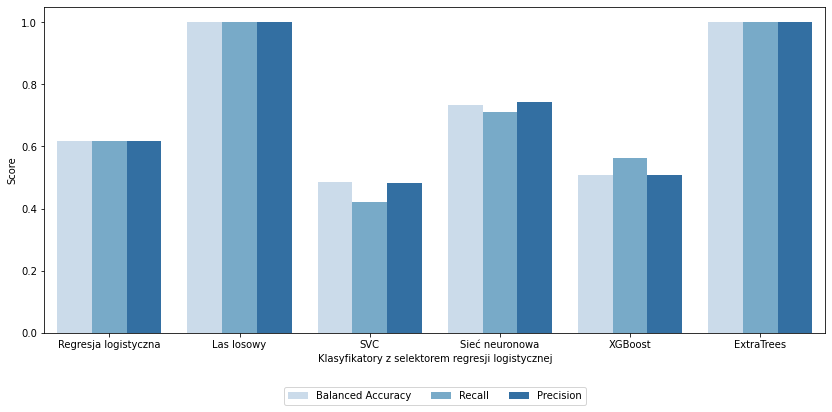

In [106]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

modele_nazwy_zregresja = ["Regresja logistyczna", "Las losowy", "SVC","Sieć neuronowa", 
"XGBoost","ExtraTrees"]
modele = [model1, model2, model3_zRegresją,model4_zregresja,model5_zregresja,model6_zRegresją]

balanced_accuracy_scores = []
recall_scores = []
precision_scores = []

for model in modele:
    y_pred = model.predict(X_train)
    y_pred[y_pred == -1] = 0
    balanced_accuracy_scores.append(balanced_accuracy_score(y_train,y_pred))
    recall_scores.append(recall_score(y_train,y_pred))
    precision_scores.append(precision_score(y_train,y_pred))

df_zregresja = pd.DataFrame({
    'Klasyfikatory z selektorem regresji logistycznej': modele_nazwy_zregresja * 3,
    'Metryka': ['Balanced Accuracy'] * 6 + ['Recall'] * 6 + ['Precision'] * 6,
    'Score': balanced_accuracy_scores + recall_scores + precision_scores
})

plt.figure(figsize=(14, 6))
sns.barplot(x='Klasyfikatory z selektorem regresji logistycznej', y='Score', hue='Metryka', data=df_zregresja, palette='Blues')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

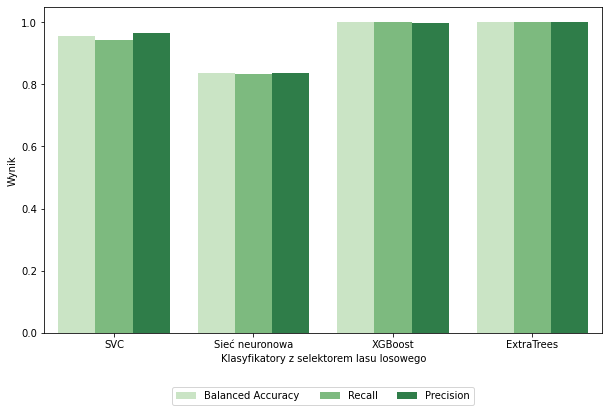

In [107]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

modele_nazwy = ["SVC","Sieć neuronowa", 
"XGBoost","ExtraTrees"]
modele = [model3,model4,model5,model6]

balanced_accuracy_scores = []
recall_scores = []
precision_scores = []
for model in modele:
    y_pred = model.predict(X_train)
    y_pred[y_pred == -1] = 0
    balanced_accuracy_scores.append(balanced_accuracy_score(y_train,y_pred))
    recall_scores.append(recall_score(y_train,y_pred))
    precision_scores.append(precision_score(y_train,y_pred))

df = pd.DataFrame({
    'Klasyfikatory z selektorem lasu losowego': modele_nazwy * 3,
    'Metryka': ['Balanced Accuracy'] * 4 + ['Recall'] * 4 + ['Precision'] * 4,
    'Wynik': balanced_accuracy_scores + recall_scores + precision_scores
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Klasyfikatory z selektorem lasu losowego', y='Wynik', hue='Metryka', data=df, palette='Greens')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

## 4.2 Zapisanie 3 najlepszych wyników do plików txt

In [151]:
wyniki = model2.predict_proba(X_test)
wyniki = wyniki[:,1]

# Zapis do pliku
with open('wyniki_model2.txt', 'w') as plik:
    plik.write(str("320575") + '\n')
    for wynik in wyniki:
        plik.write(str(wynik) + '\n')

In [152]:
wyniki = model5.predict_proba(X_test)
wyniki = wyniki[:,1]

# Zapis do pliku
with open('wyniki_model5.txt', 'w') as plik:
    plik.write(str("320575") + '\n')
    for wynik in wyniki:
        plik.write(str(wynik) + '\n')

In [353]:
wyniki = model6_zRegresją.predict_proba(X_test)
wyniki = wyniki[:,1]

# Zapis do pliku
with open('wyniki_model6.txt', 'w') as plik:
    plik.write(str("320575") + '\n')
    for wynik in wyniki:
        plik.write(str(wynik) + '\n')

# 4.3 Stworzenie baggingu dla powyzszych, które osiągnęły nizsze wyniki modeli. Przeprowadzenie ostatnecznej decyzji wyboru

In [124]:
# bagging na modelów:
bagging_model1 = BaggingClassifier(model1, n_estimators=50, random_state=33) # Logistic Reggresion
bagging_model1.fit(X_train,y_train)

BaggingClassifier(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                            ('feature_selector',
                                             SequentialFeatureSelector(estimator=LogisticRegression(C=0.01,
                                                                                                    max_iter=1000,
                                                                                                    penalty='l1',
                                                                                                    solver='liblinear'),
                                                                       n_features_to_select=20)),
                                            ('classifier',
                                             LogisticRegression(C=0.001))]),
                  n_estimators=50, random_state=33)

In [125]:
bagging_model1.score(X_train,y_train)

0.6185

In [286]:
bagging_model3 = BaggingClassifier(model3, n_estimators=50, random_state=33) # SVC
bagging_model4 = BaggingClassifier(model4, n_estimators=50, random_state=33) # Neural Network
bagging_model3.fit(X_train,y_train)
print("done")
bagging_model4.fit(X_train,y_train)
print("done") # 2700 minut

done
done


## 4.5 Wyniki bagging vs. no bagging

In [291]:
y__pred_bagging_model3 = bagging_model3.predict(X_train)
score_bagging_model3 = balanced_accuracy_score(y__pred_bagging_model3,y_train)
print("bagging svc: ", score_bagging_model3)
y__pred_model3 = model3.predict(X_train)
score_model3 = balanced_accuracy_score(y__pred_model3,y_train)
print("svc: ", score_model3)

print("----")

y__pred_bagging_model4 = bagging_model4.predict(X_train)
score_bagging_model4 = balanced_accuracy_score(y__pred_bagging_model4,y_train)
print("bagging neural network: ", score_bagging_model4)
y__pred_model4 = model4.predict(X_train)
score_model4 = balanced_accuracy_score(y__pred_model4,y_train)
print("neural network: ", score_model4)

bagging svc:  0.96800748811981
svc:  0.9495364124494083
----
bagging neural network:  0.8877050959957817
neural network:  0.836001344005376


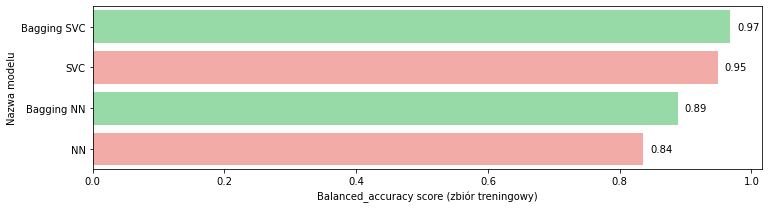

In [325]:
models = ['Bagging SVC', 'SVC', 'Bagging NN', 'NN']
scores = [score_bagging_model3, score_model3, score_bagging_model4, score_model4]

data = {'Nazwa modelu': models, 'Balanced_accuracy score (zbiór treningowy)': scores, 'Bagging': ['With', 'Without', 'With', 'Without']}
df = pd.DataFrame(data)

# Tworzenie wykresu
plt.figure(figsize=(12, 3))
light = sns.color_palette('pastel').as_hex()[3]
light2 = sns.color_palette('pastel').as_hex()[2]
sns.barplot(x='Balanced_accuracy score (zbiór treningowy)', y='Nazwa modelu',data=df, palette={light2, light})
for i, score in enumerate(scores):
    plt.text(score + 0.01, i, round(score, 2), va='center', ha='left', color='black')
# Wyświetlanie wykresu
plt.show()

In [336]:
wyniki = bagging_model4.predict_proba(X_test)
wyniki = wyniki[:,1]

# Zapis do pliku
with open('wyniki_nn_bagging.txt', 'w') as plik:
    plik.write(str("320575") + '\n')
    for wynik in wyniki:
        plik.write(str(wynik) + '\n')

In [337]:
wyniki = bagging_model3.predict_proba(X_test)
wyniki = wyniki[:,1]

# Zapis do pliku
with open('wyniki_svc_bagging.txt', 'w') as plik:
    plik.write(str("320575") + '\n')
    for wynik in wyniki:
        plik.write(str(wynik) + '\n')

### Stworzenie klasyfikatora głosowania dla stworzonych 6 modeli

In [154]:
# Model voting z uzyciem wszystkich poprzednich modeli bez baggingów
from sklearn.ensemble import VotingClassifier
voting = Pipeline([
    ('scaler', StandardScaler()),
    ('eclf', VotingClassifier(estimators=[('lr', model1),
                             ('rf', model2),
                             ('svc', model3),
                             ('nn', model4),
                             ('xg', model5),
                             ('ext', model6)]))
])

voting.fit(X_train, y_train)

/Users/janpoglod/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [01:04:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimtors" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('scaler', StandardScaler()),
                ('eclf',
                 VotingClassifier(estimators=[('lr',
                                               Pipeline(steps=[('scaler',
                                                                StandardScaler()),
                                                               ('feature_selector',
                                                                SequentialFeatureSelector(estimator=LogisticRegression(C=0.01,
                                                                                                                       max_iter=1000,
                                                                                                                       penalty='l1',
                                                                                                                       solver='liblinear'),
                                                                                          n_features_to_select=20)),
                                                               ('classifier',
                                                                LogisticRegression(C=0.001))])),
                                              ('rf',
                                               Pipeline(ste...
                                                                              n_estimators=None,
                                                                              n_estimtors=200,
                                                                              n_jobs=None,
                                                                              num_parallel_tree=None, ...))])),
                                              ('ext',
                                               Pipeline(steps=[('scaler',
                                                                StandardScaler()),
                                                               ('feature_selector',
                                                                SequentialFeatureSelector(estimator=RandomForestClassifier(max_depth=20,
                                                                                                                           min_samples_leaf=2,
                                                                                                                           n_estimators=200),
                                                                                          n_features_to_select=20)),
                                                               ('classifier',
                                                                ExtraTreesClassifier(max_depth=20,
                                                                                     n_estimators=200))]))]))])

In [229]:
voting.score(X_train,y_train)

0.988

### Stworzenie klasyfikatora głosowania dla najlepszych osiągniętych modeli

In [331]:
wyniki_las_losowy = model2.predict(X_test)
wyniki_las_losowy[wyniki_las_losowy == -1] = 0
wyniki_extratrees_zregresja = model6_zRegresją.predict(X_test)
wyniki_extratrees = model6.predict(X_test)
wyniki_xgboost = model5.predict(X_test)
wyniki_svc = model3.predict(X_test)
wyniki_svc[wyniki_svc == -1] = 0
y__pred_bagging_model3 = bagging_model3.predict(X_test)
y__pred_bagging_model4 = bagging_model4.predict(X_test)
predykcje_najlepsze = [wyniki_las_losowy,wyniki_extratrees_zregresja,wyniki_extratrees,wyniki_xgboost,wyniki_svc,y__pred_bagging_model3,y__pred_bagging_model4]

Poprawność wyników modeli na zbiorze testowym:


Text(0.5, 1.0, 'Predykcje na zbiorze testowym dla najlepszych modeli')

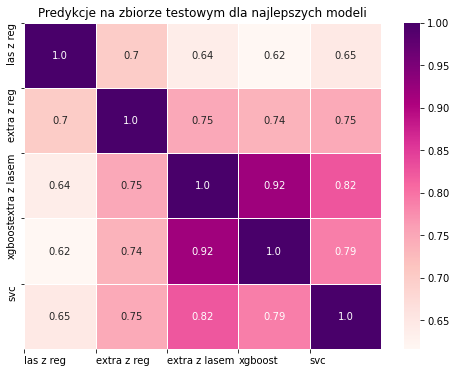

In [263]:
print("Poprawność wyników modeli na zbiorze testowym:")
poprawnosc = [[0 for _ in range(5)] for _ in range(5)]
i=0
for m1 in predykcje_najlepsze:
    j=0
    for m2 in predykcje_najlepsze:
        poprawnosc[i][j] = balanced_accuracy_score(m2,m1)
        j+=1
    i+=1
poprawnosc = pd.DataFrame(poprawnosc, columns = ["las z reg","extra z reg","extra z lasem","xgboost","svc"])
plt.figure(figsize=(8, 6))
sns.heatmap(poprawnosc, cmap="RdPu", annot=True, fmt=".2", linewidths=.5)
plt.yticks(ticks=range(len(poprawnosc.columns)), labels=poprawnosc.columns, rotation=90,va='top')
plt.xticks(ticks=range(len(poprawnosc.columns)), labels=poprawnosc.columns, rotation=0,ha='left')
plt.title("Predykcje na zbiorze testowym dla najlepszych modeli")

## + modele z bagigniem

Poprawność wyników modeli na zbiorze testowym:


Text(0.5, 1.0, 'Predykcje na 7 zbiorze testowym dla najlepszych modeli')

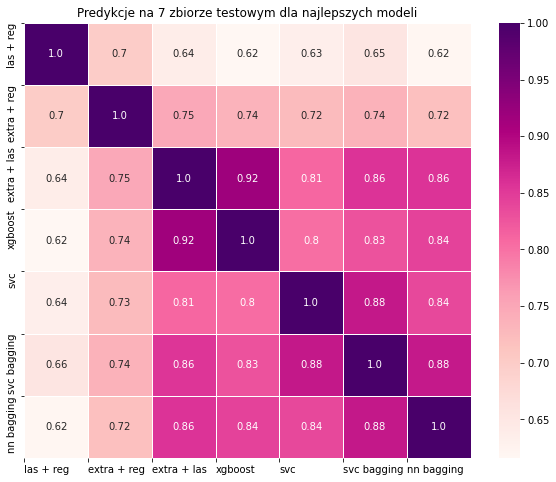

In [335]:
print("Poprawność wyników modeli na zbiorze testowym:")
poprawnosc = [[0 for _ in range(7)] for _ in range(7)]
i=0
for m1 in predykcje_najlepsze:
    j=0
    for m2 in predykcje_najlepsze:
        poprawnosc[i][j] = balanced_accuracy_score(m2,m1)
        j+=1
    i+=1
poprawnosc = pd.DataFrame(poprawnosc, columns = ["las + reg","extra + reg","extra + las","xgboost","svc","svc bagging","nn bagging"])
plt.figure(figsize=(10, 8))
sns.heatmap(poprawnosc, cmap="RdPu", annot=True, fmt=".2", linewidths=.5)
plt.yticks(ticks=range(len(poprawnosc.columns)), labels=poprawnosc.columns, rotation=90,va='top')
plt.xticks(ticks=range(len(poprawnosc.columns)), labels=poprawnosc.columns, rotation=0,ha='left')
plt.title("Predykcje na 7 zbiorze testowym dla najlepszych modeli")

hard voting

In [265]:
# Model voting z uzyciem wszystkich poprzednich modeli bez baggingów
from sklearn.ensemble import VotingClassifier
voting_best = Pipeline([
    ('scaler', StandardScaler()),
    ('eclf', VotingClassifier(estimators=[('svc', model3),
                             ('extra2', model6_zRegresją),
                             ('las', model6_zRegresją),
                             ('xg', model5),
                             ('extra', model6)
                             ]))
])
y_train[y_train == -1] = 0
voting_best.fit(X_train, y_train)

/Users/janpoglod/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [02:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimtors" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('scaler', StandardScaler()),
                ('eclf',
                 VotingClassifier(estimators=[('svc',
                                               Pipeline(steps=[('scaler',
                                                                StandardScaler()),
                                                               ('feature_selector',
                                                                SequentialFeatureSelector(estimator=RandomForestClassifier(max_depth=20,
                                                                                                                           min_samples_leaf=2,
                                                                                                                           n_estimators=200),
                                                                                          n_features_to_select=20)),
                                                               ('classifier',
                                                                SVC(C=1,
                                                                    gamma=0.1))])),
                                              ('rf',
                                               Pipeline(steps=[('sc...
                                                                              n_estimators=None,
                                                                              n_estimtors=200,
                                                                              n_jobs=None,
                                                                              num_parallel_tree=None, ...))])),
                                              ('nn',
                                               Pipeline(steps=[('scaler',
                                                                StandardScaler()),
                                                               ('feature_selector',
                                                                SequentialFeatureSelector(estimator=RandomForestClassifier(max_depth=20,
                                                                                                                           min_samples_leaf=2,
                                                                                                                           n_estimators=200),
                                                                                          n_features_to_select=20)),
                                                               ('classifier',
                                                                ExtraTreesClassifier(max_depth=20,
                                                                                     n_estimators=200))]))]))])

In [268]:
y_pred = voting_best.predict(X_train)
print(balanced_accuracy_score(y_train,y_pred))

1.0


soft voting

In [284]:
# Model voting z uzyciem wszystkich poprzednich modeli bez baggingów
from sklearn.ensemble import VotingClassifier
voting_best = Pipeline([
    ('scaler', StandardScaler()),
    ('eclf', VotingClassifier(estimators=[('svc', model3),
                             ('extra2', model6_zRegresją),
                             ('xg', model5),
                             ('extra', model6)
                             ], voting='soft'))
])
y_train[y_train == -1] = 0
voting_best.fit(X_train, y_train)

y_pred = voting_best.predict(X_train)

/Users/janpoglod/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [23:00:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimtors" } are not used.

  warnings.warn(smsg, UserWarning)


In [357]:
y_pred = voting_best.predict(X_train)
voting_wyniki = voting_best.predict_proba(X_test)
voting_wyniki = voting_wyniki[:,1]
print(balanced_accuracy_score(y_train,y_pred))
print(recall_score(y_train,y_pred))
print(precision_score(y_train,y_pred))

# Zapis do pliku
with open('320575_artifical_prediction.txt', 'w') as plik:
    plik.write(str("320575") + '\n')
    for wynik in voting_wyniki:
        plik.write(str(wynik) + '\n')

0.9995
1.0
0.999000999000999


### Kolejny votingclassifier ( z bagingami )

In [355]:
# Model voting z uzyciem wszystkich poprzednich modeli + baggingów
from sklearn.ensemble import VotingClassifier
voting_best2 = Pipeline([
    ('scaler', StandardScaler()), 
    ('eclf', VotingClassifier(estimators=[('svc_b', bagging_model3),
                             ('extra2', model6_zRegresją),
                             ('xg', model5),
                             ('extra', model6)
                             ], voting='soft'))
])
y_train[y_train == -1] = 0
voting_best2.fit(X_train, y_train)

y_pred_best = voting_best2.predict(X_train)

/Users/janpoglod/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [18:50:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimtors" } are not used.

  warnings.warn(smsg, UserWarning)


## 6. Zapisanie najlepszego modelu

In [356]:
voting2_wyniki = voting_best2.predict_proba(X_test)
voting2_wyniki = voting2_wyniki[:,1]
print(balanced_accuracy_score(y_train,y_pred_best))
print(recall_score(y_train,y_pred_best))
print(precision_score(y_train,y_pred_best))

# Zapis do pliku
with open('320575_artifical_prediction.txt', 'w') as plik:
    plik.write(str("320575") + '\n')
    for wynik in voting2_wyniki:
        plik.write(str(wynik) + '\n')

1.0
1.0
1.0
